<a href="https://colab.research.google.com/github/arishma108/QuantumComputing/blob/master/Quantum%20Information/Entanglement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.9 MB/s eta 0:00:00


In [4]:
!pip install qiskit-aer  # Install the missing package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 44.6 MB/s eta 0:00:00


In [5]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

In [6]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw())

░      ┌───┐ ░    ┌─┐ ░                                     »
  Q: ───────────░───■──┤ H ├─░────┤M├─░─────────────────────────────────────»
     ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░                                     »
  A: ┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─────────────────────────────────────»
     └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ ┌────── ┌───┐ ───────┐ ┌────── ┌───┐»
  B: ─────┤ X ├─░────────────░──╫──╫──░─┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├»
          └───┘ ░            ░  ║  ║  ░ └──╥─── └───┘ ───────┘ └──╥─── └───┘»
                                ║  ║    ┌──╨──┐                   ║         »
a: 1/═══════════════════════════╩══╬════╡ 0x1 ╞═══════════════════╬═════════»
                                0  ║    └─────┘                ┌──╨──┐      »
b: 1/══════════════════════════════╩═══════════════════════════╡ 0x1 ╞══════»
                                   0                           └─────┘      »
«               
«  Q: ──────────
«               
«  A: ──────────
«      ───────┐ 
«  B:   End-0 ├─
«      ───────┘ 
«a: 1/══════════
«               
«b: 1/══════════
«

In [7]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

array([[-0.92945321+0.j        ,  0.16484428+0.3300653j ],
       [-0.16164013+0.3316462j , -0.92940962+0.00900101j]])

In [8]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw())

┌─────────────────────────┐ ░            ░      ┌───┐ ░    ┌─┐ ░ »
       Q: ┤ U(5.5274,2.0243,4.2492) ├─░────────────░───■──┤ H ├─░────┤M├─░─»
          └─────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ ┌─┐└╥┘ ░ »
       A: ────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─┤M├─╫──░─»
                                      ░ └───┘┌─┴─┐ ░ └───┘      ░ └╥┘ ║  ░ »
       B: ────────────────────────────░──────┤ X ├─░────────────░──╫──╫──░─»
                                      ░      └───┘ ░            ░  ║  ║  ░ »
     a: 1/═════════════════════════════════════════════════════════╩══╬════»
                                                                   0  ║    »
     b: 1/════════════════════════════════════════════════════════════╩════»
                                                                      0    »
Result: 1/═════════════════════════════════════════════════════════════════»
                                                                           »
«                                                         ░ »
«       Q: ───────────────────────────────────────────────░─»
«                                                         ░ »
«       A: ───────────────────────────────────────────────░─»
«          ┌────── ┌───┐ ───────┐ ┌────── ┌───┐ ───────┐  ░ »
«       B: ┤ If-0  ┤ X ├  End-0 ├─┤ If-0  ┤ Z ├  End-0 ├──░─»
«          └──╥─── └───┘ ───────┘ └──╥─── └───┘ ───────┘  ░ »
«          ┌──╨──┐                   ║                      »
«     a: 1/╡ 0x1 ╞═══════════════════╬══════════════════════»
«          └─────┘                ┌──╨──┐                   »
«     b: 1/═══════════════════════╡ 0x1 ╞═══════════════════»
«                                 └─────┘                   »
«Result: 1/═════════════════════════════════════════════════»
«                                                           »
«                                           
«       Q: ─────────────────────────────────
«                                           
«       A: ─────────────────────────────────
«          ┌────────────────────────────┐┌─┐
«       B: ┤ U(-5.5274,-4.2492,-2.0243) ├┤M├
«          └────────────────────────────┘└╥┘
«     a: 1/═══════════════════════════════╬═
«                                         ║ 
«     b: 1/═══════════════════════════════╬═
«                                         ║ 
«Result: 1/═══════════════════════════════╩═
«                                         0

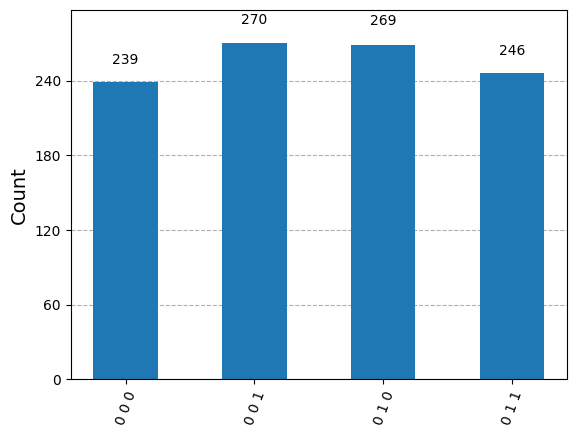

In [9]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

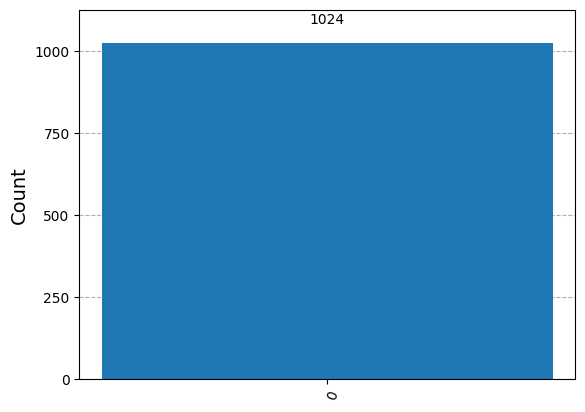

In [10]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

In [11]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [12]:
c = "1"
d = "0"

In [13]:
protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw())

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

Measured 10 with frequency 1.0


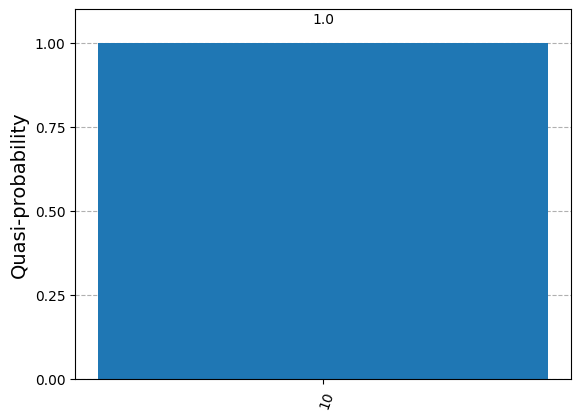

In [14]:
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

In [15]:
rbg = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

# Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

# Use the 'randomizer' qubit twice to generate Alice's bits c and d.
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

# Now the protocol runs, starting with Alice's actions, which depend
# on her bits.
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)
test.barrier()

# Bob's actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)

display(test.draw())

░ ┌───┐┌─┐┌───┐┌─┐ ░                                »
randomizer: ───────────░─┤ H ├┤M├┤ H ├┤M├─░────────────────────────────────»
            ┌───┐      ░ └───┘└╥┘└───┘└╥┘ ░ ┌────── ┌───┐ ───────┐ ┌────── »
         A: ┤ H ├──■───░───────╫───────╫──░─┤ If-0  ┤ Z ├  End-0 ├─┤ If-0  »
            └───┘┌─┴─┐ ░       ║       ║  ░ └──╥─── └───┘ ───────┘ └──╥─── »
         B: ─────┤ X ├─░───────╫───────╫──░────╫──────────────────────╫────»
                 └───┘ ░       ║       ║  ░ ┌──╨──┐                   ║    »
 Alice d: 1/═══════════════════╬═══════╩════╡ 0x1 ╞═══════════════════╬════»
                               ║       0    └─────┘                ┌──╨──┐ »
 Alice c: 1/═══════════════════╩═══════════════════════════════════╡ 0x1 ╞═»
                               0                                   └─────┘ »
   Bob d: 1/═══════════════════════════════════════════════════════════════»
                                                                           »
   Bob c: 1/═══════════════════════════════════════════════════════════════»
                                                                           »
«                            ░            ░       
«randomizer: ────────────────░────────────░───────
«            ┌───┐ ───────┐  ░      ┌───┐ ░ ┌─┐   
«         A: ┤ X ├  End-0 ├──░───■──┤ H ├─░─┤M├───
«            └───┘ ───────┘  ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
«         B: ────────────────░─┤ X ├──────░──╫─┤M├
«                            ░ └───┘      ░  ║ └╥┘
« Alice d: 1/════════════════════════════════╬══╬═
«                                            ║  ║ 
« Alice c: 1/════════════════════════════════╬══╬═
«                                            ║  ║ 
«   Bob d: 1/════════════════════════════════╩══╬═
«                                            0  ║ 
«   Bob c: 1/═══════════════════════════════════╩═
«                                               0

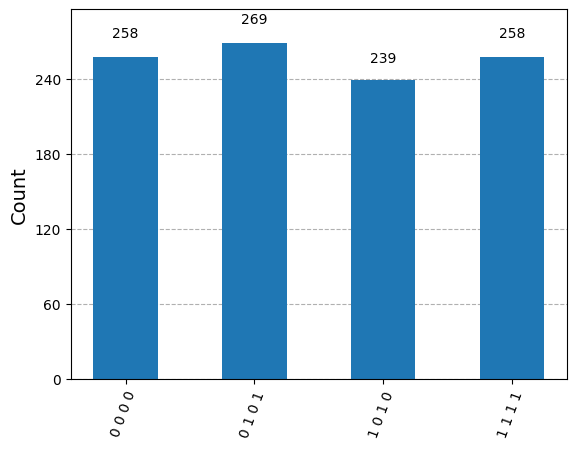

In [16]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

In [17]:
# Required imports

from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from numpy import pi
from numpy.random import randint

In [18]:
def chsh_game(strategy):
    """Plays the CHSH game
    Args:
        strategy (callable): A function that takes two bits (as `int`s) and
            returns two bits (also as `int`s). The strategy must follow the
            rules of the CHSH game.
    Returns:
        int: 1 for a win, 0 for a loss.
    """
    # Referee chooses x and y randomly
    x, y = randint(0, 2), randint(0, 2)

    # Use strategy to choose a and b
    a, b = strategy(x, y)

    # Referee decides if Alice and Bob win or lose
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

In [19]:
def chsh_circuit(x, y):
    """Creates a `QuantumCircuit` that implements the best CHSH strategy.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        QuantumCircuit: Circuit that, when run, returns Alice and Bob's
            answer bits.
    """
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # Alice
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi / 2, 0)
    qc.measure(0, 0)

    # Bob
    if y == 0:
        qc.ry(-pi / 4, 1)
    else:
        qc.ry(pi / 4, 1)
    qc.measure(1, 1)

    return qc

In [20]:
# Draw the four possible circuits

print("(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw())

print("(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw())

print("(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw())

print("(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw())

(x,y) = (0,0)


┌───┐      ░  ┌───────┐  ┌─┐   
q_0: ┤ H ├──■───░──┤ Ry(0) ├──┤M├───
     └───┘┌─┴─┐ ░ ┌┴───────┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─░─┤ Ry(-π/4) ├─╫─┤M├
          └───┘ ░ └──────────┘ ║ └╥┘
c: 2/══════════════════════════╩══╩═
                               0  1

(x,y) = (0,1)


┌───┐      ░  ┌───────┐ ┌─┐   
q_0: ┤ H ├──■───░──┤ Ry(0) ├─┤M├───
     └───┘┌─┴─┐ ░ ┌┴───────┴┐└╥┘┌─┐
q_1: ─────┤ X ├─░─┤ Ry(π/4) ├─╫─┤M├
          └───┘ ░ └─────────┘ ║ └╥┘
c: 2/═════════════════════════╩══╩═
                              0  1

(x,y) = (1,0)


┌───┐      ░ ┌──────────┐┌─┐   
q_0: ┤ H ├──■───░─┤ Ry(-π/2) ├┤M├───
     └───┘┌─┴─┐ ░ ├──────────┤└╥┘┌─┐
q_1: ─────┤ X ├─░─┤ Ry(-π/4) ├─╫─┤M├
          └───┘ ░ └──────────┘ ║ └╥┘
c: 2/══════════════════════════╩══╩═
                               0  1

(x,y) = (1,1)


┌───┐      ░ ┌──────────┐┌─┐   
q_0: ┤ H ├──■───░─┤ Ry(-π/2) ├┤M├───
     └───┘┌─┴─┐ ░ ├─────────┬┘└╥┘┌─┐
q_1: ─────┤ X ├─░─┤ Ry(π/4) ├──╫─┤M├
          └───┘ ░ └─────────┘  ║ └╥┘
c: 2/══════════════════════════╩══╩═
                               0  1

In [21]:
sampler = Sampler()


def quantum_strategy(x, y):
    """Carry out the best strategy for the CHSH game.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    # `shots=1` runs the circuit once
    result = sampler.run(chsh_circuit(x, y), shots=1).result()
    statistics = result.quasi_dists[0].binary_probabilities()
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    return a, b

In [22]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(quantum_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.869


In [23]:
def classical_strategy(x, y):
    """An optimal classical strategy for the CHSH game
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    # Alice's answer
    if x == 0:
        a = 0
    elif x == 1:
        a = 1

    # Bob's answer
    if y == 0:
        b = 1
    elif y == 1:
        b = 0

    return a, b

In [24]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(classical_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.756
